# Descripción
   ### Los datos están relacionados con campañas de marketing directo de una institución bancaria. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito a plazo bancario) estaría ('sí') o no ('no') suscrito.


    Reglas y método de evaluación
    
    El desafío consistirá en que cada grupo formado deberá entregar un arreglo con los resultados ('yes' o 'no') y se medirá la medida de desempeño F1 score (macro).
    
    EL archivo de entrega debe ser en formato csv sin indice. Debe ser una sola columna con valores ´yes´ o ´no´ en 5210 filas


#### Variables de entrada:

# datos del cliente bancario:
1 - edad (numérico)

2 - trabajo: tipo de trabajo (categórico: 'admin.', 'Obrero', 'emprendedor', 'empleada doméstica', 'gerencia', 'jubilado', 'autónomo', 'servicios', 'estudiante' , 'técnico', 'desempleado', 'desconocido')

3 - marital: estado civil (categórico: 'divorciado', 'casado', 'soltero', 'desconocido'; nota: 'divorciado' significa divorciado o viudo)

4 - educación (categórica: 'básico.4y', 'básico.6y', 'básico.9y', 'escuela secundaria', 'analfabeto', 'curso.profesional', 'título universitario', 'desconocido')

5 - incumplimiento: ¿tiene crédito en incumplimiento? (categórico: 'no', 'sí', 'desconocido')

6 - vivienda: ¿tiene préstamo para vivienda? (categórico: 'no', 'sí', 'desconocido')

7 - préstamo: ¿tiene préstamo personal? (categórico: 'no', 'sí', 'desconocido')

# relacionado con el último contacto de la campaña actual:

8 - contacto: tipo de comunicación de contacto (categórico: 'celular', 'teléfono')

9 - mes: último mes de contacto del año (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: último día de contacto de la semana (categórico: 'lun', 'tue', 'mié', 'jue', 'vie')

11 - duración: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si duración = 0, entonces y = 'no'). Sin embargo, se desconoce la duración antes de realizar una llamada. Además, después de la finalización de la llamada y, obviamente, se conoce. Por lo tanto, esta entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

# otros atributos:

12 - campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye último contacto)

13 - pdays: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)

14 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)

15 - poutcome: resultado de la campaña de marketing anterior (categórico: 'fracaso', 'inexistente', 'éxito')

Variable de salida (objetivo deseado):

21 - y - ¿el cliente ha suscrito un depósito a plazo? (binario: 'sí', 'no')


# Comenzando

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


from imblearn.over_sampling import RandomOverSampler
import imblearn

In [2]:
df_train = pd.read_csv('Trainset.csv', index_col= 'Unnamed: 0')
df_test = pd.read_csv('TestFeatures.csv')
final = pd.read_csv('submission_example.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  pdays      40000 non-null  int64 
 14  previous   40000 non-null  int64 
 15  poutcome   40000 non-null  object
 16  y          40000 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [4]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,46,management,single,tertiary,no,593,yes,no,cellular,29,jan,190,3,-1,0,unknown,no
1,42,admin.,married,tertiary,no,1536,no,no,cellular,6,aug,140,1,182,4,failure,no
2,33,blue-collar,married,secondary,no,370,yes,no,cellular,8,apr,249,1,-1,0,unknown,no
3,29,blue-collar,single,secondary,no,1472,no,no,cellular,18,may,246,2,-1,0,unknown,no
4,29,technician,married,secondary,no,767,yes,no,cellular,5,feb,253,1,-1,0,unknown,no


## Eliminar Columnas
duration   



In [5]:
df_train = df_train.drop(['duration'], axis=1)
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,46,management,single,tertiary,no,593,yes,no,cellular,29,jan,3,-1,0,unknown,no
1,42,admin.,married,tertiary,no,1536,no,no,cellular,6,aug,1,182,4,failure,no
2,33,blue-collar,married,secondary,no,370,yes,no,cellular,8,apr,1,-1,0,unknown,no
3,29,blue-collar,single,secondary,no,1472,no,no,cellular,18,may,2,-1,0,unknown,no
4,29,technician,married,secondary,no,767,yes,no,cellular,5,feb,1,-1,0,unknown,no


## Distribution

In [ ]:
# df_train.hist(figsize=(12,12), color = 'darkblue')
# plt.show()

### Mayormente los usuarios NO tiene contratado el producto

In [ ]:
df_train.y.value_counts()

In [ ]:
df_train.y.value_counts()/df_train.shape[0]

# Preproceso de datos Ecoding Test Train

### Copias de los datos.

In [6]:
# Datos sin balanceo
df_prep = df_train.copy()
df_train_oh = df_train.copy()

# Encoding de datos Train

## encoding datos label+ replace

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df_prep['job']=labelencoder.fit_transform(df_prep['job'].values)
df_prep['marital']=labelencoder.fit_transform(df_prep['marital'].values)
df_prep['education']=labelencoder.fit_transform(df_prep['education'].values)
df_prep['contact']=labelencoder.fit_transform(df_prep['contact'].values)
df_prep['poutcome']=labelencoder.fit_transform(df_prep['poutcome'].values)

df_prep['default'].replace(['yes','no'],[1,0],inplace=True)
df_prep['housing'].replace(['yes','no'],[1,0],inplace=True)
df_prep['loan'].replace(['yes','no'],[1,0],inplace=True)
df_prep['y'].replace(['yes','no'],[1,0],inplace=True)
df_prep['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug' , 'sep','oct','nov','dec'],
                         [1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)



#CATEGORICAS ['job','marital','education','contact','month','poutcome']
#NUMERICAS ['age','balance','day','campaign','pdays','previous']
#BINARIAS  ['default','housing','loan','y']  

In [ ]:
df_prep.head()

In [ ]:
df_prep['y'].unique(),df_prep['y'].value_counts()

## Normalizacion Train

In [ ]:
# #selecionamos las columnas que normalizaremos
df_norm = df_prep[['age','balance','campaign','pdays','previous','poutcome']]
df_prep2 = df_prep.drop(columns=['age','balance','campaign','pdays','previous','poutcome'])

from sklearn.preprocessing import MinMaxScaler
df_trans = MinMaxScaler()
df_trans = df_trans.fit_transform(df_norm)

df_trans = pd.DataFrame(df_trans)
df_trans.columns = df_norm.columns

df_train_trans = pd.concat([df_trans, df_prep2], axis=1,)
df_train_trans.reindex(columns=['age','job','marital','education','default','balance','housing',
                          'loan','contact','day','month','campaign','pdays','previous','poutcome','y'])

df_train_trans.head()

In [ ]:
#df_prep = pd.get_dummies(df_prep,drop_first=True)

## encoding onehot + minmax

In [7]:
# One hot encode the categorical variables
lst = ['job','marital','education','contact','month','poutcome','default','housing','loan']
remove = list()
for i in lst:
    if (df_train_oh[i].dtype == np.str or df_train_oh[i].dtype == np.object):
        for j in df_train_oh[i].unique():
            df_train_oh[i+'_'+j] = np.where(df_train_oh[i] == j,1,0)
        remove.append(i)
df_train_oh = df_train_oh.drop(remove, axis=1)
df_train_oh.head()

,age,balance,day,campaign,pdays,previous,y,job_management,job_admin.,job_blue-collar,...,poutcome_unknown,poutcome_failure,poutcome_success,poutcome_other,default_no,default_yes,housing_yes,housing_no,loan_no,loan_yes
0,46,593,29,3,-1,0,no,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,42,1536,6,1,182,4,no,0,1,0,...,0,1,0,0,1,0,0,1,1,0
2,33,370,8,1,-1,0,no,0,0,1,...,1,0,0,0,1,0,1,0,1,0
3,29,1472,18,2,-1,0,no,0,0,1,...,1,0,0,0,1,0,0,1,1,0
4,29,767,5,1,-1,0,no,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [8]:
df_train_oh['y'].replace(['yes','no'],[1,0],inplace=True)

In [9]:
continuous_vars= ['age','balance','day','campaign','pdays','previous']
# minMax scaling the continuous variables
minVec = df_train_oh[continuous_vars].min().copy()
maxVec = df_train_oh[continuous_vars].max().copy()
df_train_oh[continuous_vars] = (df_train_oh[continuous_vars]-minVec)/(maxVec-minVec)
df_train_oh.head()

,age,balance,day,campaign,pdays,previous,y,job_management,job_admin.,job_blue-collar,...,poutcome_unknown,poutcome_failure,poutcome_success,poutcome_other,default_no,default_yes,housing_yes,housing_no,loan_no,loan_yes
0,0.363636,0.078187,0.933333,0.032258,0.000000,0.000000,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,0.311688,0.086748,0.166667,0.000000,0.209862,0.014545,0,0,1,0,...,0,1,0,0,1,0,0,1,1,0
2,0.194805,0.076163,0.233333,0.000000,0.000000,0.000000,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
3,0.142857,0.086167,0.566667,0.016129,0.000000,0.000000,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
4,0.142857,0.079767,0.133333,0.000000,0.000000,0.000000,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# train_trans  = MinMaxScaler()
# train_trans  = train_trans.fit_transform(df_norm)

# from sklearn.preprocessing import Normalizer
# train_trans  = Normalizer()
# train_trans  = train_trans.fit_transform(df_norm)

# from sklearn.preprocessing import OneHotEncoder
# train_trans  = OneHotEncoder()
# train_trans  = train_trans.fit_transform(df_norm)



# #crearmamos el dataset
# train_trans = pd.DataFrame(train_trans)
# train_trans.columns = df_prep.columns
# train_trans.reindex(columns=['age','job','marital','education','default','balance','housing',
#                          'loan','contact','day','month','campaign','pdays','previous','poutcome','y'])


# Preproceso datos test

## encoding datos sin balanceo

#### Esto es necesario para poder probar el modelo sobre la misma estructura de datos pre_procesados de train.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_test['job']=labelencoder.fit_transform(df_test['job'].values)
df_test['marital']=labelencoder.fit_transform(df_test['marital'].values)
df_test['education']=labelencoder.fit_transform(df_test['education'].values)
df_test['contact']=labelencoder.fit_transform(df_test['contact'].values)
df_test['poutcome']=labelencoder.fit_transform(df_test['poutcome'].values)

df_test['default'].replace(['yes','no'],[1,0],inplace=True)
df_test['housing'].replace(['yes','no'],[1,0],inplace=True)
df_test['loan'].replace(['yes','no'],[1,0],inplace=True)
df_test['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug' , 'sep','oct','nov','dec'],
                         [1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

#CATEGORICAS ['job','marital','education','contact','month','poutcome']
#NUMERICAS ['age','balance','day','campaign','pdays','previous']
#BINARIAS  ['default','housing','loan']

In [ ]:
test_trans = df_test

## Normalizacion Test

In [ ]:
df_norm_test = df_test[['age','balance','campaign','pdays','previous']]
df_prep_test = df_test.drop(columns=['age','balance','campaign','pdays','previous','duration'])

from sklearn.preprocessing import MinMaxScaler
df_trans = MinMaxScaler()
df_trans = df_trans.fit_transform(df_norm_test)

df_trans = pd.DataFrame(df_trans)
df_trans.columns = df_norm_test.columns

test_trans = pd.concat([df_trans, df_prep_test], axis=1,)
test_trans.reindex(columns=['age','job','marital','education','balance','housing',
                         'loan','contact','day','month','campaign','pdays','previous','poutcome'])

test_trans.head()

## encoding onehot + minmax

In [10]:
# One hot encode the categorical variables
lst = ['job','marital','education','contact','month','poutcome','default','housing','loan']
remove = list()
for i in lst:
    if (df_test[i].dtype == np.str or df_test[i].dtype == np.object):
        for j in df_test[i].unique():
            df_test[i+'_'+j] = np.where(df_test[i] == j,1,0)
        remove.append(i)
df_test = df_test.drop(remove, axis=1)
df_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_retired,job_entrepreneur,...,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,51,394,28,968,2,-1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,56,334,21,101,1,-1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,50,52,31,22,8,-1,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
3,54,653,15,352,1,-1,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
4,47,0,19,213,2,-1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [11]:
continuous_vars= ['age','balance','day','campaign','pdays','previous']
# minMax scaling the continuous variables
minVec = df_test[continuous_vars].min().copy()
maxVec = df_test[continuous_vars].max().copy()
df_test[continuous_vars] = (df_test[continuous_vars]-minVec)/(maxVec-minVec)
df_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_retired,job_entrepreneur,...,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,0.470588,0.073101,0.900000,968,0.023810,0.0,0.0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,0.544118,0.072116,0.666667,101,0.000000,0.0,0.0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,0.455882,0.067485,1.000000,22,0.166667,0.0,0.0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
3,0.514706,0.077355,0.466667,352,0.000000,0.0,0.0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
4,0.411765,0.066631,0.600000,213,0.023810,0.0,0.0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# test_trans  = MinMaxScaler()
# test_trans  = test_trans.fit_transform(df_test)

# from sklearn.preprocessing import Normalizer
# test_trans  = Normalizer()
# test_trans  = test_trans.fit_transform(df_test)


# from sklearn.preprocessing import OneHotEncoder
# test_trans  = OneHotEncoder()
# test_trans  = test_trans.fit_transform(df_test)

In [ ]:
#test_trans = pd.get_dummies(test_trans,drop_first=True)

In [ ]:
# #rearmamos el dataset
# test_trans = pd.DataFrame(test_trans)
# test_trans.columns = df_test.columns

In [ ]:
test_trans.describe()

# Balanceo de datos

# Oversampling

In [12]:
#Separamos el set de datos
x = df_train_trans.drop(['y'], axis=1)
y = df_train_trans['y']

NameError: name 'df_train_trans' is not defined

In [ ]:
random_over = RandomOverSampler(sampling_strategy='auto',
                               random_state=123)

X_over,y_over = random_over.fit_resample(x,y)
df_over = X_over
df_over['y'] = y_over

print(df_over.y.value_counts()/df_over.shape[0])
print(df_over.y.value_counts())
print(df_over.shape)
df_over.head()

## Sampling - oh.minmax

In [13]:
#Separamos el set de datos
x = df_train_oh.drop(['y'], axis=1)
y = df_train_oh['y']

In [14]:
random_over = RandomOverSampler(sampling_strategy='auto',
                               random_state=123)

X_over,y_over = random_over.fit_resample(x,y)
df_over = X_over
df_over['y'] = y_over

print(df_over.y.value_counts()/df_over.shape[0])
print(df_over.y.value_counts())
print(df_over.shape)
df_over.head()

0    0.5
1    0.5
Name: y, dtype: float64
0    35347
1    35347
Name: y, dtype: int64
(70694, 51)


,age,balance,day,campaign,pdays,previous,job_management,job_admin.,job_blue-collar,job_technician,...,poutcome_failure,poutcome_success,poutcome_other,default_no,default_yes,housing_yes,housing_no,loan_no,loan_yes,y
0,0.363636,0.078187,0.933333,0.032258,0.000000,0.000000,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0.311688,0.086748,0.166667,0.000000,0.209862,0.014545,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
2,0.194805,0.076163,0.233333,0.000000,0.000000,0.000000,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
3,0.142857,0.086167,0.566667,0.016129,0.000000,0.000000,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
4,0.142857,0.079767,0.133333,0.000000,0.000000,0.000000,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0


# Undersampling

In [ ]:
from sklearn.utils import resample, shuffle

#set the minority class to a seperate dataframe
df_yes = df_train_trans[df_train['y'] == 'yes']
#set other classes to another dataframe
df_no = df_train_trans[df_train['y'] == 'no']  

#upsample the class
df_no_upsampled = resample(df_no,
                           random_state=123,
                           n_samples=len(df_yes),
                           replace=False)

#concatenate the upsampled dataframe
df_under = pd.concat([df_no_upsampled,df_yes])

print(df_under.y.value_counts()/df_under.shape[0])
print(df_under.y.value_counts())
print(df_under.shape)
df_under.head()

#### Tenemos dos set de datos Balanceados en dos formas diferentes

# Ejecutando Modelos 

In [ ]:
#df_train_trans
#df_over
#df_under
#df_train_oh

In [ ]:
#df_over = df_over.sample(frac=0.95, random_state=786)

In [15]:
from pycaret.classification import *
clf1 = setup(data = df_over,
             target = 'y',
             train_size=0.3,
             session_id=123,
            )

best_model = compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9088,0.9634,0.9369,0.8852,0.9103,0.8177,0.8191,1.3930
et,Extra Trees Classifier,0.9056,0.9663,0.9288,0.8855,0.9066,0.8112,0.8122,1.4110
dt,Decision Tree Classifier,0.8549,0.8559,0.9317,0.8051,0.8637,0.7104,0.7191,0.1400
xgboost,Extreme Gradient Boosting,0.7993,0.8793,0.7621,0.8188,0.7894,0.5982,0.5997,1.8450
catboost,CatBoost Classifier,0.7855,0.8688,0.7229,0.8213,0.7689,0.5703,0.5744,5.7410
knn,K Neighbors Classifier,0.7493,0.8292,0.7851,0.7284,0.7556,0.4991,0.5006,1.6410
lightgbm,Light Gradient Boosting Machine,0.7718,0.8537,0.7019,0.8105,0.7523,0.5428,0.5477,0.4710
gbc,Gradient Boosting Classifier,0.7392,0.8063,0.6503,0.7847,0.7111,0.4772,0.4843,1.5640
ada,Ada Boost Classifier,0.7195,0.7845,0.6439,0.7524,0.6938,0.4380,0.4426,0.6280
lda,Linear Discriminant Analysis,0.7055,0.7703,0.6266,0.7375,0.6774,0.4098,0.4146,0.1260


###### Evaluando F1 antes de continuar con los modelos

    modelo_1 = 

    modelo_2 = 

    modelo_3 = 0.3472 xgboost
    
    modelo_4 = 0.3478 qda
    
    modelo_5 = 0.3262 qda   
    
    modelo_6_over = 0.88 RF
    
    modelo_7_under = 0.77 gbc
    
    modelo_8_under_dummi = 0.9155

In [16]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9161,0.9694,0.9389,0.8961,0.9170,0.8322,0.8332
1,0.9099,0.9594,0.9341,0.8891,0.9110,0.8200,0.8210
2,0.8906,0.9591,0.9293,0.8603,0.8935,0.7814,0.7839
3,0.9048,0.9623,0.9341,0.8803,0.9064,0.8096,0.8111
4,0.9024,0.9593,0.9351,0.8757,0.9044,0.8049,0.8068
5,0.9038,0.9585,0.9265,0.8842,0.9049,0.8077,0.8086
6,0.9184,0.9701,0.9465,0.8944,0.9197,0.8370,0.8383
7,0.9180,0.9700,0.9465,0.8936,0.9193,0.8360,0.8375
8,0.9113,0.9630,0.9350,0.8907,0.9123,0.8227,0.8237
9,0.9127,0.9629,0.9426,0.8875,0.9142,0.8256,0.8271


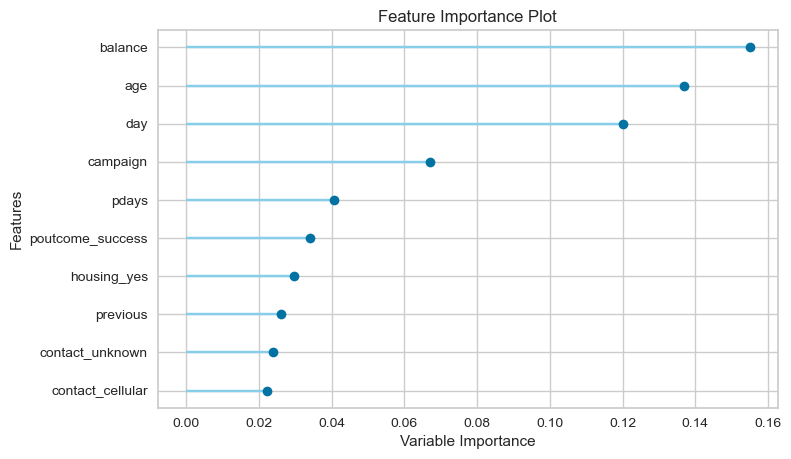

In [17]:
plot_model(rf, plot = 'feature')

# Modelo en Blender Top3

In [18]:
from pycaret.classification import *
clf2 = setup(data = df_over,
             target = 'y',
             train_size=0.3,
             session_id=123,
            )

top3 = compare_models(n_select = 3)
blender = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8944,0.9720,0.9398,0.8594,0.8978,0.7890,0.7924
1,0.8864,0.9599,0.9217,0.8585,0.8890,0.7729,0.7750
2,0.8934,0.9641,0.9360,0.8604,0.8966,0.7871,0.7901
3,0.8892,0.9660,0.9255,0.8606,0.8919,0.7786,0.7807
4,0.8991,0.9635,0.9389,0.8676,0.9018,0.7984,0.8010
5,0.8854,0.9584,0.9179,0.8596,0.8878,0.7710,0.7728
6,0.9019,0.9699,0.9398,0.8716,0.9044,0.8040,0.8064
7,0.8986,0.9699,0.9341,0.8701,0.9010,0.7974,0.7995
8,0.8995,0.9649,0.9359,0.8702,0.9019,0.7992,0.8014
9,0.8887,0.9666,0.9359,0.8528,0.8924,0.7776,0.7812


    Precision nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?
    
    Recall nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?
    
    F1 combina Precision y Recall en una sola medida
    
    La Matriz de Confusión indica qué tipos de errores se cometen

In [ ]:
print(best_model)

## Stacker

In [47]:
exp_name = setup(data = df_over,  target = 'y')
top3 = compare_models(n_select = 3)
stacker = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9905,0.9988,0.9947,0.9864,0.9905,0.9810,0.9810
1,0.9905,0.9993,0.9956,0.9856,0.9906,0.9810,0.9811
2,0.9883,0.9995,0.9952,0.9817,0.9884,0.9766,0.9767
3,0.9893,0.9988,0.9952,0.9836,0.9894,0.9786,0.9786
4,0.9891,0.9991,0.9943,0.9840,0.9891,0.9782,0.9782
5,0.9887,0.9981,0.9919,0.9855,0.9887,0.9774,0.9774
6,0.9895,0.9984,0.9947,0.9844,0.9895,0.9790,0.9790
7,0.9883,0.9989,0.9952,0.9817,0.9884,0.9766,0.9766
8,0.9903,0.9983,0.9952,0.9856,0.9903,0.9806,0.9806
9,0.9891,0.9980,0.9943,0.9840,0.9891,0.9782,0.9782


## Auto_Mod

In [55]:
auto_mod = setup(data = df_over,  target = 'y')

top3 = compare_models(n_select = 2)
tuned_top3 = [tune_model(i) for i in top3]
blender = blend_models(tuned_top3)
stacker = stack_models(tuned_top3)
best_f1_model = automl(optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7749,0.8564,0.6988,0.8235,0.7560,0.5497,0.5561
1,0.7545,0.8406,0.6765,0.8007,0.7334,0.5089,0.5151
2,0.7812,0.8627,0.7017,0.8337,0.7620,0.5622,0.5694
3,0.7553,0.8390,0.6742,0.8041,0.7334,0.5105,0.5173
4,0.7632,0.8492,0.6722,0.8211,0.7392,0.5262,0.5351
5,0.7662,0.8495,0.6960,0.8089,0.7482,0.5322,0.5375
6,0.7648,0.8506,0.6830,0.8158,0.7435,0.5294,0.5365
7,0.7530,0.8421,0.6842,0.7927,0.7345,0.5060,0.5107
8,0.7718,0.8457,0.7109,0.8088,0.7567,0.5436,0.5476
9,0.7633,0.8432,0.6879,0.8094,0.7437,0.5266,0.5326


# Optimizando Hiperparametros
### por F1

In [19]:
tuned_rf = tune_model(rf, optimize ='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7129,0.7647,0.6189,0.7552,0.6803,0.4243,0.4313
1,0.7190,0.7837,0.6485,0.7486,0.6950,0.4370,0.4408
2,0.6893,0.7555,0.6141,0.7160,0.6612,0.3774,0.3812
3,0.7067,0.7827,0.6294,0.7380,0.6794,0.4123,0.4167
4,0.7025,0.7622,0.6304,0.7301,0.6766,0.4039,0.4076
5,0.7011,0.7653,0.6237,0.7312,0.6732,0.4010,0.4053
6,0.7072,0.7790,0.6285,0.7393,0.6794,0.4132,0.4178
7,0.6978,0.7653,0.6074,0.7344,0.6649,0.3942,0.4001
8,0.7024,0.7583,0.6004,0.7467,0.6656,0.4031,0.4109
9,0.7071,0.7636,0.6338,0.7358,0.6810,0.4130,0.4169


In [20]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


# Ensamble

In [35]:
# entrenar un clasificador de ensacado en dt
bagged_dt = ensemble_model ( rf, method = 'Bagging' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8958,0.9540,0.9169,0.8775,0.8968,0.7917,0.7925
1,0.8934,0.9469,0.9179,0.8728,0.8948,0.7870,0.7880
2,0.8769,0.9436,0.9179,0.8460,0.8804,0.7541,0.7568
3,0.8911,0.9493,0.9198,0.8676,0.8929,0.7823,0.7837
4,0.8793,0.9451,0.9093,0.8553,0.8815,0.7588,0.7602
5,0.8826,0.9437,0.9035,0.8647,0.8837,0.7653,0.7661
6,0.8986,0.9570,0.9322,0.8714,0.9008,0.7974,0.7993
7,0.8982,0.9562,0.9293,0.8726,0.9001,0.7965,0.7981
8,0.8925,0.9516,0.9092,0.8773,0.8930,0.7850,0.7855
9,0.8934,0.9476,0.9254,0.8674,0.8955,0.7869,0.7887


In [36]:
# entrenar un clasificador adaboost en dt con 100 estimadores
boosted_dt = ensemble_model ( rf, method = 'Boosting' , n_estimators = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9161,0.9690,0.9417,0.8939,0.9172,0.8322,0.8334
1,0.9114,0.9604,0.9331,0.8922,0.9122,0.8228,0.8236
2,0.8925,0.9611,0.9322,0.8614,0.8954,0.7852,0.7878
3,0.9062,0.9629,0.9360,0.8813,0.9078,0.8125,0.8140
4,0.9010,0.9583,0.9341,0.8740,0.9030,0.8021,0.8040
5,0.9010,0.9587,0.9293,0.8774,0.9026,0.8021,0.8035
6,0.9137,0.9684,0.9456,0.8871,0.9154,0.8276,0.8293
7,0.9184,0.9688,0.9446,0.8958,0.9196,0.8370,0.8382
8,0.9104,0.9648,0.9340,0.8898,0.9114,0.8208,0.8218
9,0.9123,0.9640,0.9446,0.8853,0.9140,0.8247,0.8265


# Prediccion

In [31]:
predict_model(rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9221,0.9711,0.9489,0.9014,0.9246,0.8442,0.8454


In [34]:
predict_model(boosted_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9216,0.9710,0.9502,0.8994,0.9241,0.8431,0.8444


In [48]:
predict_model(stacker);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9930,0.9989,0.9965,0.9896,0.9930,0.9860,0.9861


In [49]:
rf_final = finalize_model(stacker)
#Parámetros finales del modelo Random Forest para su despliegue a producción
print(rf_final)

StackingClassifier(cv=StratifiedKFold(n_splits=10, random_state=4304, shuffle=False),
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
  

    Al utilizar pycaret no es recomendable utilizar el predict luego de finalizar, dado que estariamos intentando predecir los mismo datos que entrenamos.

# Testeando resultados.

In [50]:
test_predictions = predict_model(rf_final, data = df_test)
test_predictions.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_retired,job_entrepreneur,...,poutcome_other,poutcome_success,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,Label,Score
0,0.470588,0.073101,0.900000,968,0.023810,0.0,0.0,1,0,0,...,0,0,1,0,1,0,1,0,0,1.0
1,0.544118,0.072116,0.666667,101,0.000000,0.0,0.0,0,1,0,...,0,0,1,0,1,0,1,0,0,1.0
2,0.455882,0.067485,1.000000,22,0.166667,0.0,0.0,0,0,1,...,0,0,1,0,1,0,1,0,0,1.0
3,0.514706,0.077355,0.466667,352,0.000000,0.0,0.0,0,0,1,...,0,0,1,0,0,1,1,0,0,1.0
4,0.411765,0.066631,0.600000,213,0.023810,0.0,0.0,0,0,0,...,0,0,1,0,1,0,1,0,0,1.0


# Resultado

In [51]:
from pycaret.utils import check_metric

check_metric(test_predictions['default'], test_predictions['Label'], 'Accuracy')

KeyError: 'default'

accura_m1 =

accura_m2 = 0.9232 - puntaje 49.2757

    fix_imbalance = True, 
                 train_size = 0.2, 
                 iterative_imputation_iters = 5,
                 normalize = True,
                 normalize_method = 'minmax',
                 transformation = True,
                 high_cardinality_features = ['job','education','month'],
                 numeric_features = ['age','balance','day','campaign','pdays','previous'] )
             
accura_m3 = 0.9378  - puntaje 
     
     Es necesario preprocesar datos de test y train
      
accura_m3 = 0.9798
     
     Aplicamos modelo qda



accura_m3 = 0.9384 

    Aplicamos catboost
    
accura_m4_over = 0.7417

accura_m6_over_prep =0.9313

accura_m7_ = 0.9449

accura_m8 = 0.9313 Bosting 10


# Guardando datos para carga

In [52]:
test_predictions['Label'].replace([1,0],['yes','no'],inplace=True)

In [53]:
label = test_predictions[['Label']]

In [54]:
label.to_csv('example_staker.csv',index=False , header = False )